# Welcome to the ProgPy Predict Specific Event Example!

In this example we are using the [Unscented Transform Predictor](https://nasa.github.io/progpy/api_ref/prog_algs/Predictor.html#included-predictors), `UTPredictor`, to predict a specific event, in this case impact. This will then ignore the other events which are not of interest.

We'll first pass in data to our `StateEstimator`, and then we'll call a our UTPredictor given our current state. We'll then print the results.

Given the diagram below, we'll be performing all the steps in the red box.

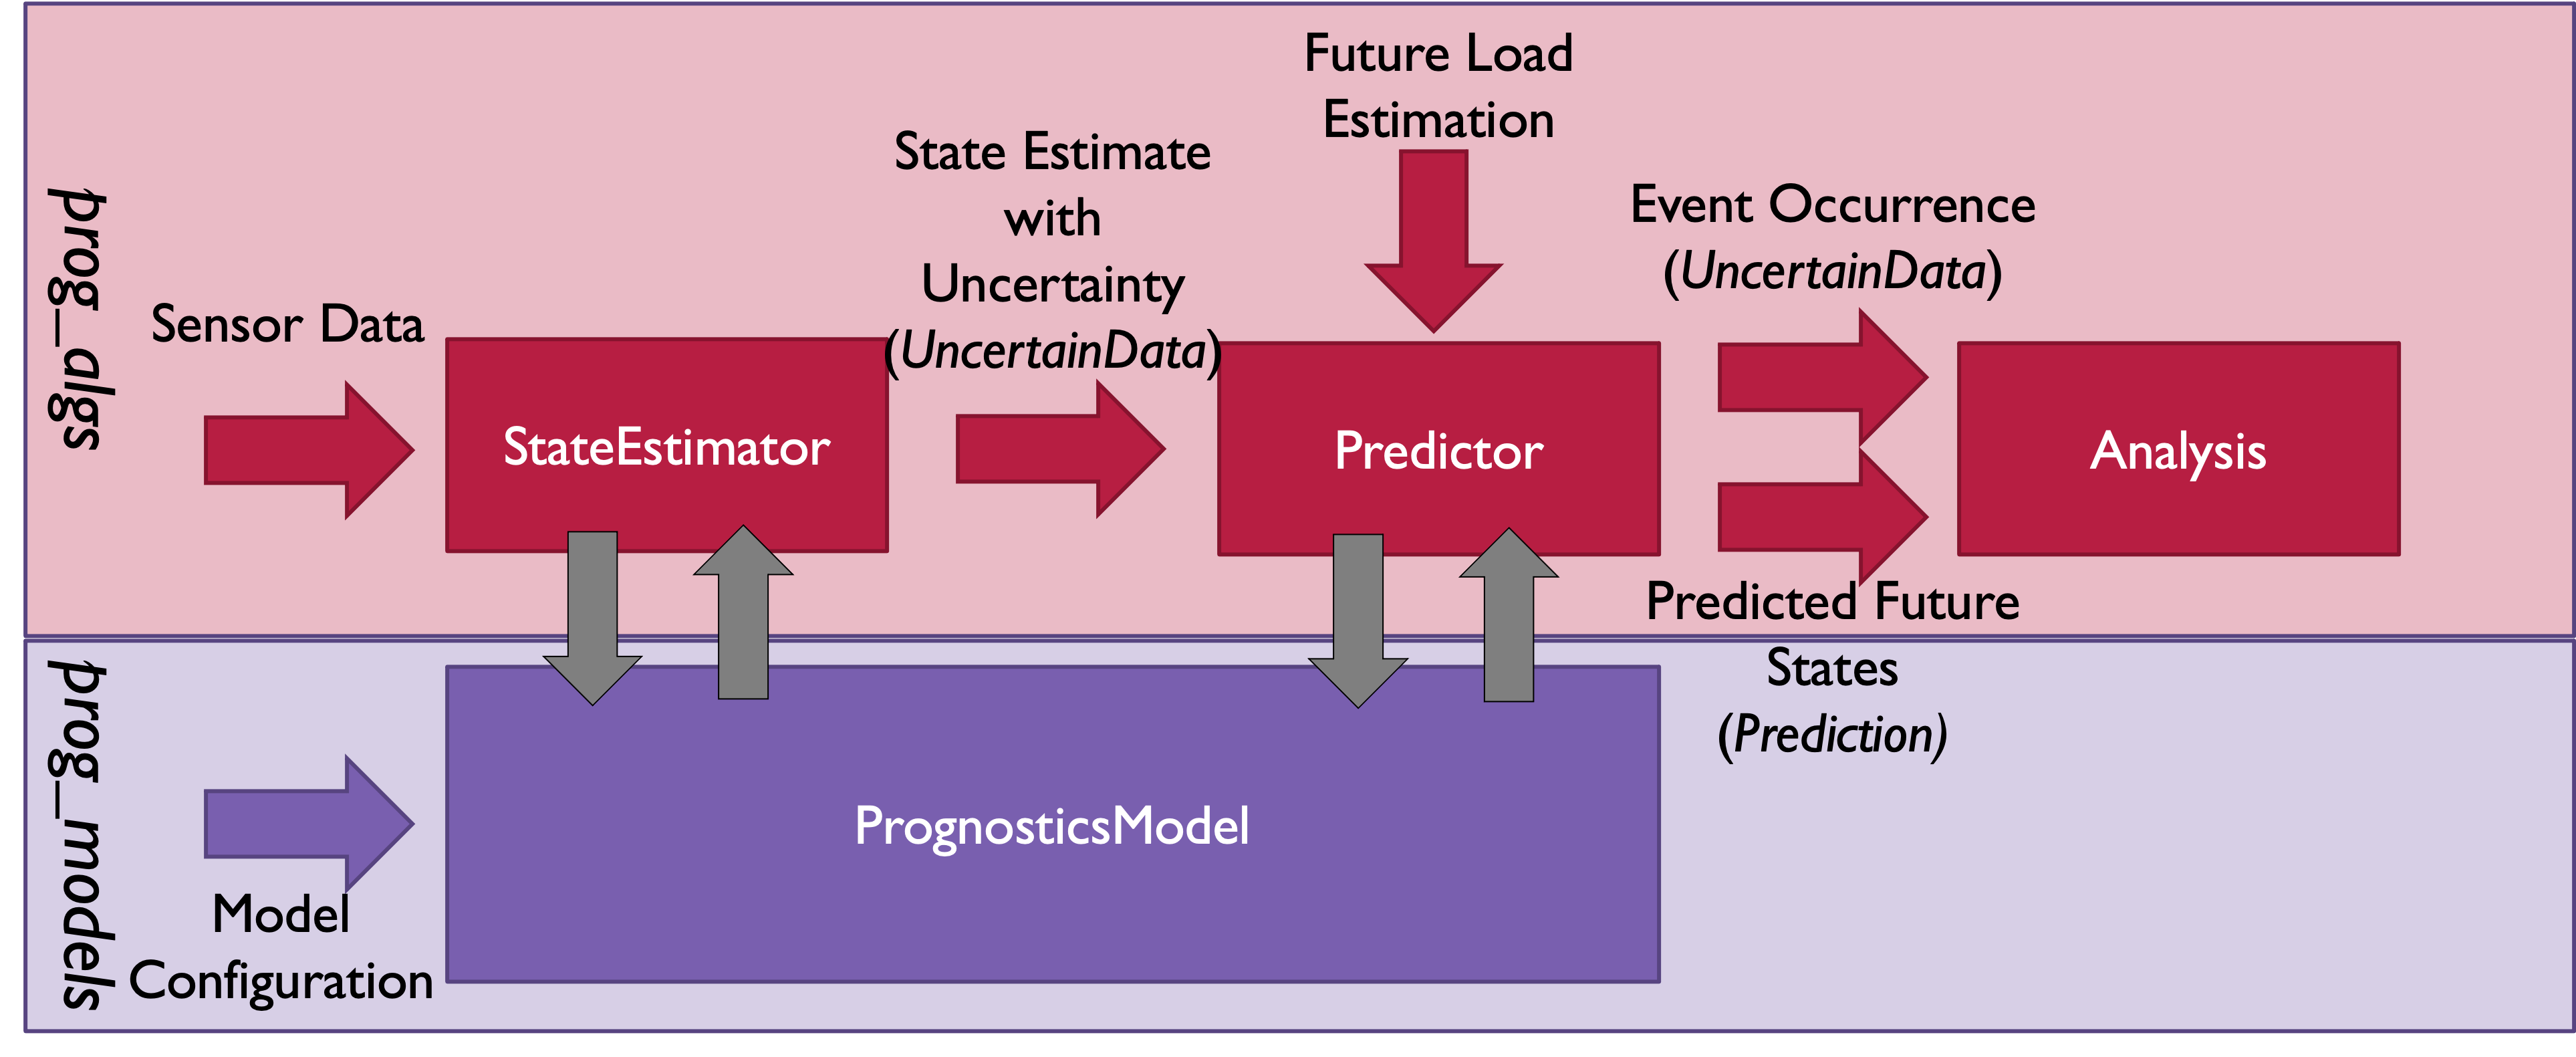

### Importing Modules

In [ ]:
from progpy import state_estimators, predictors
from progpy.models.thrown_object import ThrownObject
import matplotlib.pyplot as plt

Our model is based on the ThrownObject class, which represents a certain dynamical system. We initialized our model, set up our loading function, and then estimated the state using the UnscentedKalmanFilter method, which is a popular method in state estimation for nonlinear systems.

In [ ]:
m = ThrownObject()
initial_state = m.initialize()
load = m.InputContainer({}) # Optimization - create once
def future_loading(t, x = None):
    return load

Next, we'll use the Unscented Kalman Filter to predict the time of the next specific event. Let's call our estimate function and then feed that into our `UTPredictor`.

In [ ]:
filt = state_estimators.UnscentedKalmanFilter(m, initial_state)
filt.estimate(0.1, {}, m.output(initial_state))

The resulting UnscentedKalmanFilter state will be used to make a prediction with a step size of 0.1.

The event that we will be predicting would be the `impact` of the Thrown Object.

In [ ]:
# Setup Prediction
pred = predictors.UnscentedTransformPredictor(m)

# Predict with a step size of 0.1
mc_results = pred.predict(filt.x, future_loading, dt=0.1, save_freq= 1, events=['impact'])

Let's plot the results!

In [ ]:
# Save Results
times = []
states_x = []
states_v = []
outputs_x = []
event_states_x = []
event_states_v = []


# Saving the results
for i, time in enumerate(mc_results.times):
    times.append(time)
    states_x.append(mc_results.states.snapshot(i).mean['x'])
    states_v.append(mc_results.states.snapshot(i).mean['v'])
    outputs_x.append(mc_results.outputs.snapshot(i).mean['x'])
    event_states_x.append(mc_results.states.snapshot(i).mean['x'])
    event_states_v.append(mc_results.states.snapshot(i).mean['v'])

# Plot Results
plt.figure(figsize=(10, 8))

# States Plot
plt.subplot(2, 2, 1)
plt.plot(times, states_x, label='x')
plt.plot(times, states_v, label='v')
plt.title('States')
plt.legend()

# Outputs Plot
plt.subplot(2, 2, 2)
plt.plot(times, outputs_x)
plt.title('Outputs')

# Event States Plot
plt.subplot(2, 2, 3)
plt.plot(times, event_states_x, label='x')
plt.plot(times, event_states_v, label='v')
plt.title('Event States')
plt.legend()

plt.tight_layout()
plt.show()

We can also print out the results of an individual event. For example, let's print out the time of impact event.

In [ ]:
print('\nToE:', mc_results.time_of_event.mean)

### Conclusion

In this example, we showcase the predictive capabilities of the ProgPy library and its application to specific dynamical systems. It also demonstrates the efficiency and accuracy of unscented Kalman filters in state estimation and prediction tasks.



For more information, please refer to our ProgPy [Documentation](https://nasa.github.io/progpy/index.html). 